In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from  scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
data1 = pd.read_excel('fifa_data.xlsx')
data1

,NAME,RAT,POS,PAC,SHO,PAS,DRI,DEF,PHY,HEI,IGS,AGE,NATION,TEAM,VALUE
0,Robert Lewandowski,98,FW,93,97,89,95,51,92,184,2498,33,Poland,Bayern Munich,60.0
1,Cristiano Ronaldo,98,FW,95,99,90,95,43,90,187,2474,36,Portugal,Juventus FC,45.0
2,Lionel Messi,98,FW,91,99,96,99,43,80,170,2477,34,Argentina,Paris Saint-Germain,80.0
3,Kylian Mbappé,97,FW,99,94,92,97,50,92,178,2483,22,France,Paris Saint-Germain,160.0
4,Karim Benzema,97,CF,90,95,96,97,48,90,185,2491,33,France,Real Madrid,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Marcelo Grohe,85,GK,85,84,80,88,50,86,188,891,34,Brazil,Al-Ittihad Jeddah,1.2
197,Adem Büyük,85,LM,91,88,81,87,35,79,177,2221,33,Turkey,Yeni Malatyaspor,1.3
198,Ahmed Hegazi,85,CB,70,33,60,70,85,92,194,1887,30,Egypt,Al-Ittihad Jeddah,4.0
199,Altay Bayindir,85,GK,88,80,79,89,35,80,198,691,23,Turkey,Fenerbahce SK,14.0


In [6]:
#< 가설 설정>

#1. 선수 가치는 Rating, 스탯에 비례하고 Age에 반비례할 것이다.
#2. 30세를 초과하게 되면 선수 가치가 떨어질 것이다.
#3. 선수가치가 높은 포지션은 스트라이커일 것이다.
#4. (5대륙 기준) 남미, 유럽, 아프리카 선수들은 몸값이 높을 것이다.
#5. 빅클럽에 속하는 선수는 선수가치가 높을 것이다.

<AxesSubplot:>

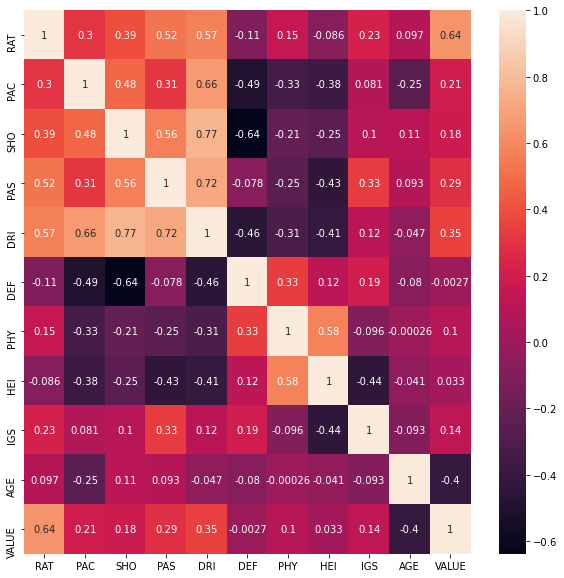

In [8]:
#1. 선수 가치는 Rating, 스탯에 비례하고 Age에 반비례할 것이다.
plt.figure(figsize=(10,10))
sns.heatmap(data1.corr(), annot=True)

In [9]:
#2. 30세를 초과하게 되면 선수 가치가 떨어질 것이다.
data1['AGE'].mean()

27.8407960199005

In [10]:
data1['VALUE'].mean()

29.276119402985078

In [12]:
age30 = data1.loc[data1['AGE']>=30]
age30

,NAME,RAT,POS,PAC,SHO,PAS,DRI,DEF,PHY,HEI,IGS,AGE,NATION,TEAM,VALUE
0,Robert Lewandowski,98,FW,93,97,89,95,51,92,184,2498,33,Poland,Bayern Munich,60.0
1,Cristiano Ronaldo,98,FW,95,99,90,95,43,90,187,2474,36,Portugal,Juventus FC,45.0
2,Lionel Messi,98,FW,91,99,96,99,43,80,170,2477,34,Argentina,Paris Saint-Germain,80.0
4,Karim Benzema,97,CF,90,95,96,97,48,90,185,2491,33,France,Real Madrid,25.0
9,Kevin De Bruyne,96,CM,83,93,97,93,80,90,181,2574,30,Belgium,Manchester City,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,Salem Al Dawsari,85,LM,93,85,81,89,59,86,174,2308,30,Saudi Arabia,Al-Hilal Riyadh,3.2
196,Marcelo Grohe,85,GK,85,84,80,88,50,86,188,891,34,Brazil,Al-Ittihad Jeddah,1.2
197,Adem Büyük,85,LM,91,88,81,87,35,79,177,2221,33,Turkey,Yeni Malatyaspor,1.3
198,Ahmed Hegazi,85,CB,70,33,60,70,85,92,194,1887,30,Egypt,Al-Ittihad Jeddah,4.0


In [13]:
age30['VALUE'].mean()

13.804477611940296

In [14]:
#20이상~25미만
age20_25 = (data1.AGE >= 20) & (data1.AGE < 25)
data_age20_25 = data1.loc[age20_25,:]
data_age20_25[:3]

,NAME,RAT,POS,PAC,SHO,PAS,DRI,DEF,PHY,HEI,IGS,AGE,NATION,TEAM,VALUE
3,Kylian Mbappé,97,FW,99,94,92,97,50,92,178,2483,22,France,Paris Saint-Germain,160.0
13,Jadon Sancho,96,RM,96,94,93,98,46,83,180,2373,21,England,Manchester United,100.0
19,Erling Haaland,95,FW,95,98,82,92,56,96,194,2465,21,Norway,Borussia Dortmund,130.0


In [15]:
data_age20_25mean = data_age20_25['VALUE'].mean()
data_age20_25mean

44.27

In [16]:
# 25이상~30미만
age25_30 = (data1.AGE >= 25) & (data1.AGE < 30)
data_age25_30 = data1.loc[age25_30,:]
data_age25_30[:3]

,NAME,RAT,POS,PAC,SHO,PAS,DRI,DEF,PHY,HEI,IGS,AGE,NATION,TEAM,VALUE
5,Romelu Lukaku,96,FW,95,97,90,94,50,95,191,2487,28,Belgium,Chelsea FC,100.0
6,Mohamed Salah,96,RW,99,95,92,96,53,83,175,2469,29,Egypt,Liverpool FC,100.0
7,Bruno Fernandes,96,CAM,92,97,97,96,78,86,179,2642,26,Portugal,Manchester United,90.0


In [17]:
data_age25_30mean = data_age25_30['VALUE'].mean()
data_age25_30mean

32.69166666666667

In [18]:
age30 = (data1.AGE >= 30)
data_age30 = data1.loc[age30,:]
data_age30[:3]

,NAME,RAT,POS,PAC,SHO,PAS,DRI,DEF,PHY,HEI,IGS,AGE,NATION,TEAM,VALUE
0,Robert Lewandowski,98,FW,93,97,89,95,51,92,184,2498,33,Poland,Bayern Munich,60.0
1,Cristiano Ronaldo,98,FW,95,99,90,95,43,90,187,2474,36,Portugal,Juventus FC,45.0
2,Lionel Messi,98,FW,91,99,96,99,43,80,170,2477,34,Argentina,Paris Saint-Germain,80.0


In [19]:
data_age30mean = data_age30['VALUE'].mean()
data_age30mean

13.804477611940296

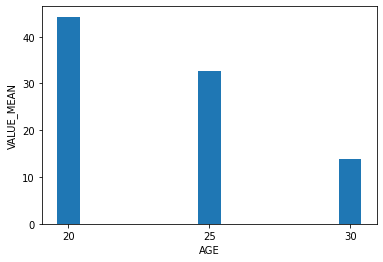

In [20]:
x = [20, 25, 30]
y = [data_age20_25mean, data_age25_30mean, data_age30mean]
plt.xlabel('AGE')
plt.ylabel('VALUE_MEAN')
plt.bar(x,y)
plt.xticks(x)
plt.show()

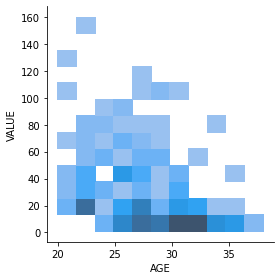

In [21]:
sns.displot(data=data1, x = "AGE", y = "VALUE", height = 4)

In [22]:
test30 = data1.loc[data1['AGE']==30]
test30[:3]

,NAME,RAT,POS,PAC,SHO,PAS,DRI,DEF,PHY,HEI,IGS,AGE,NATION,TEAM,VALUE
9,Kevin De Bruyne,96,CM,83,93,97,93,80,90,181,2574,30,Belgium,Manchester City,100.0
26,Lorenzo Insigne,94,LM,96,92,93,98,45,75,163,2408,30,Italy,SSC Napoli,48.0
45,Luis Muriel,93,FW,97,94,87,95,40,85,179,2373,30,Colombia,Atalanta BC,30.0


In [23]:
test30['VALUE'].mean()

19.33888888888889

In [24]:
data2 = data1.groupby('AGE')['VALUE'].agg(**{'VALUE_MEAN':'mean'}).reset_index() 
data2[:3]

,AGE,VALUE_MEAN
0,20,55.000
1,21,50.000
2,22,59.625


<BarContainer object of 19 artists>

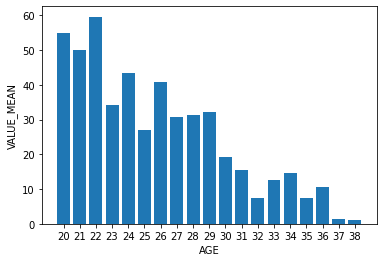

In [25]:
x=data2['AGE'].to_list()
y=data2['VALUE_MEAN'].to_list()

plt.xlabel('AGE')
plt.ylabel('VALUE_MEAN')
plt.xticks(x)

plt.bar(x, y)

In [44]:
#3. 선수가치가 높은 포지션은 스트라이커일 것이다.
fifa_data2=data1[data1["VALUE"]>=1]
fifa_data2
fifa_data3=fifa_data2.drop(["NAME","NATION","TEAM"],axis=1)
fifa_data3=fifa_data3.drop(["DEF","RAT","PAC","SHO","PAS","DRI","PHY","HEI","IGS"],axis=1)
fifa_data3=fifa_data3.sort_values(by=["VALUE"],axis=0,ascending=False)
fifa_data3=fifa_data3[0:26] #상위12퍼 26명/201명
fifa_data3

,POS,AGE,VALUE
3,FW,22,160.0
19,FW,21,130.0
10,FW,28,120.0
6,RW,29,100.0
13,RM,21,100.0
8,CAM,29,100.0
9,CM,30,100.0
5,FW,28,100.0
7,CAM,26,90.0
11,CDM,26,90.0


In [45]:
fifa_data3["POS"].replace('LW','ST',inplace=True)
fifa_data3["POS"].replace('RW','ST',inplace=True)
fifa_data3["POS"].replace('FW','ST',inplace=True)
fifa_data3["POS"].replace('CAM','MID',inplace=True)
fifa_data3["POS"].replace('CDM','MID',inplace=True)
fifa_data3["POS"].replace('CM','MID',inplace=True)
fifa_data3["POS"].replace('RM','MID',inplace=True)
fifa_data3["POS"].replace('LM','MID',inplace=True)
fifa_data3["POS"].replace('CB','DEF',inplace=True)
fifa_data3["POS"].replace('LB','DEF',inplace=True)
fifa_data3["POS"].replace('RB','DEF',inplace=True)
fifa_data3["POS"].replace('CF','DEF',inplace=True)
fifa_data3["POS"].replace('RWB','DEF',inplace=True)
fifa_data3["POS"].replace('LWB','DEF',inplace=True)

In [46]:
fifa_data3["POS"].value_counts()

MID    13
ST      8
DEF     4
GK      1
Name: POS, dtype: int64

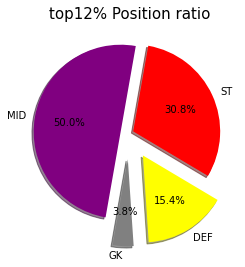

In [48]:
ratio=[50,800/26,400/26,100/26]
labels=["MID","ST","DEF","GK"]
colors=["#800080","#FF0000","#FFFF00","#808080"]
plt.pie(ratio,labels=labels,autopct='%.1f%%',startangle=260,explode=[0.1,0.05,0.3,0.3] ,counterclock=False,shadow=True,colors=colors)
plt.title("top12% Position ratio", fontsize=15)
plt.show()

In [49]:
fifa_data4=fifa_data2.drop(["DEF","RAT","PAC","SHO","PAS","DRI","PHY","HEI","IGS"],axis=1)
fifa_data4=fifa_data4.sort_values(by=["VALUE"],axis=0,ascending=False)
fifa_data4=fifa_data3[0:11]
fifa_data4

,POS,AGE,VALUE
3,ST,22,160.0
19,ST,21,130.0
10,ST,28,120.0
6,ST,29,100.0
13,MID,21,100.0
8,MID,29,100.0
9,MID,30,100.0
5,ST,28,100.0
7,MID,26,90.0
11,MID,26,90.0


In [50]:
5/201

0.024875621890547265

In [54]:
#4. (5대륙 기준) 남미, 유럽, 아프리카 선수들은 몸값이 높을 것이다.

In [55]:
fifa_nation_africa = ["Egypt", "Côte d'Ivoire", "Burkina Faso", "DR Congo", 
                                 "Senegal", "Cameroon", "Zambia", "Morocco", "Nigeria",
                                 "Algeria", "Ghana", "Jamaica"]

fifa_nation_europe = ["Poland", "Portugal", "France", "Belgium", "England", 
                      "Germany", "Slovenia", "Netherlands", "Norway", "Italy",
                      "Spain", "Serbia", "Austria", "Sweden", "Czech Republic",
                      "Croatia", "Switzerland", "Slovakia", "Finland", "Greece", 
                      "Denmark", "Bosnia-Herzegovina"]

fifa_nation_south_america = ["Argentina", "Brazil", "Uruguay", "Mexico", "Peru", "Colombia"]


fifa_nation_others = ["Korea, South", "Canada", "Australia", "United States", "Turkey", "Saudi Arabia "]

fifa_nation_asia = ["Korea, South"]

fifa_nation_north_america = ["Canada", "United States"]

fifa_nation_oceania = ["Australia"]

fifa_nation_middle_east = ["Turkey", "Saudi Arabia "]

In [56]:
def nation_to_categorical(x):
    if x in fifa_nation_africa:
        return 'africa'
    elif x in fifa_nation_europe:
        return 'europe'
    elif x in fifa_nation_south_america:
        return 'south_america'
    elif x in fifa_nation_asia:
        return 'asia'
    elif x in fifa_nation_north_america:
        return 'north_america'
    elif x in fifa_nation_oceania:
        return 'oceania'
    else:
        return 'middle_east'

In [57]:
data1['continent'] = data1['NATION'].apply(nation_to_categorical)
data1

,NAME,RAT,POS,PAC,SHO,PAS,DRI,DEF,PHY,HEI,IGS,AGE,NATION,TEAM,VALUE,continent
0,Robert Lewandowski,98,FW,93,97,89,95,51,92,184,2498,33,Poland,Bayern Munich,60.0,europe
1,Cristiano Ronaldo,98,FW,95,99,90,95,43,90,187,2474,36,Portugal,Juventus FC,45.0,europe
2,Lionel Messi,98,FW,91,99,96,99,43,80,170,2477,34,Argentina,Paris Saint-Germain,80.0,south_america
3,Kylian Mbappé,97,FW,99,94,92,97,50,92,178,2483,22,France,Paris Saint-Germain,160.0,europe
4,Karim Benzema,97,CF,90,95,96,97,48,90,185,2491,33,France,Real Madrid,25.0,europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Marcelo Grohe,85,GK,85,84,80,88,50,86,188,891,34,Brazil,Al-Ittihad Jeddah,1.2,south_america
197,Adem Büyük,85,LM,91,88,81,87,35,79,177,2221,33,Turkey,Yeni Malatyaspor,1.3,middle_east
198,Ahmed Hegazi,85,CB,70,33,60,70,85,92,194,1887,30,Egypt,Al-Ittihad Jeddah,4.0,africa
199,Altay Bayindir,85,GK,88,80,79,89,35,80,198,691,23,Turkey,Fenerbahce SK,14.0,middle_east


In [58]:
nation_mean = data1.groupby('continent')['VALUE'].mean()

In [59]:
np.array(nation_mean)

array([20.78666667, 85.        , 32.65877863, 11.4       , 36.75      ,
        1.3       , 23.97272727])

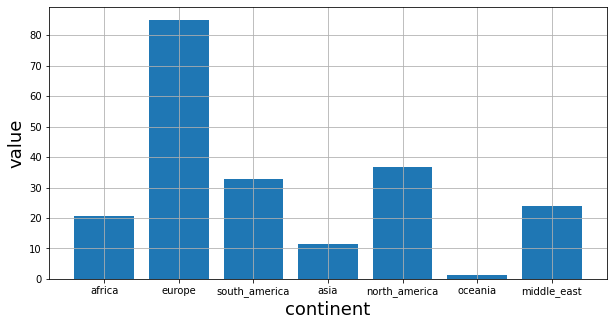

In [60]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 
plt.ylabel('value', fontsize=18)
plt.xlabel('continent', fontsize=18)
plt.bar(['africa', 'europe', 'south_america', 'asia', 'north_america', 'oceania', 'middle_east'], np.array(nation_mean))
plt.show()

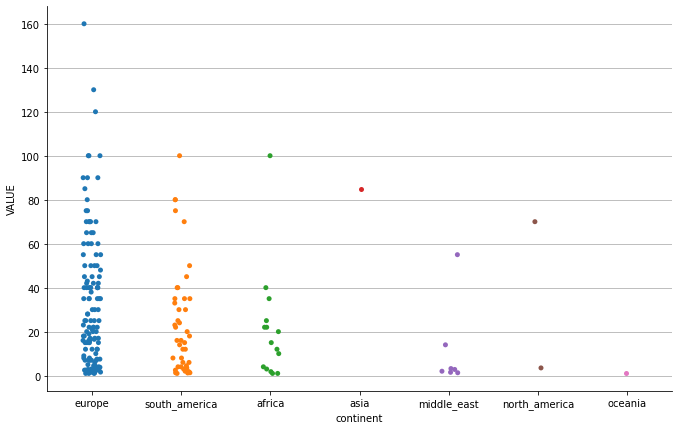

In [61]:
fig = sns.catplot(data=data1, x = 'continent', y = 'VALUE')
fig.fig.set_size_inches(10, 6) 

In [ ]:
#5. 빅클럽에 속하는 선수는 선수가치가 높을 것이다.

In [66]:
big_club=  ['Bayern Munich', 'Juventus FC', 'Paris Saint-Germain',
                'Real Madrid', 'Chelsea FC', 'Liverpool FC', 'Manchester United',
                'Manchester City', 'Tottenham Hotspur', 'Atlético de Madrid',
                'SSC Napoli', 'FC Barcelona', 'Borussia Dortmund','Inter Milan', 'SS Lazio', 'LOSC Lille',
                'Olympique Lyon', 'Atalanta BC', 'RB Leipzig','Bayer 04 Leverkusen','FC Porto','Sevilla FC',
                 'Ajax Amsterdam']

In [68]:
def big_to_categorical(x):
    if x in big_club:
        return 'big'
    else:
        return 'others'

In [69]:
data1['big_others_club'] = data1['TEAM'].apply(big_to_categorical)
data1

,NAME,RAT,POS,PAC,SHO,PAS,DRI,DEF,PHY,HEI,IGS,AGE,NATION,TEAM,VALUE,continent,big_others_club
0,Robert Lewandowski,98,FW,93,97,89,95,51,92,184,2498,33,Poland,Bayern Munich,60.0,europe,big
1,Cristiano Ronaldo,98,FW,95,99,90,95,43,90,187,2474,36,Portugal,Juventus FC,45.0,europe,big
2,Lionel Messi,98,FW,91,99,96,99,43,80,170,2477,34,Argentina,Paris Saint-Germain,80.0,south_america,big
3,Kylian Mbappé,97,FW,99,94,92,97,50,92,178,2483,22,France,Paris Saint-Germain,160.0,europe,big
4,Karim Benzema,97,CF,90,95,96,97,48,90,185,2491,33,France,Real Madrid,25.0,europe,big
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Marcelo Grohe,85,GK,85,84,80,88,50,86,188,891,34,Brazil,Al-Ittihad Jeddah,1.2,south_america,others
197,Adem Büyük,85,LM,91,88,81,87,35,79,177,2221,33,Turkey,Yeni Malatyaspor,1.3,middle_east,others
198,Ahmed Hegazi,85,CB,70,33,60,70,85,92,194,1887,30,Egypt,Al-Ittihad Jeddah,4.0,africa,others
199,Altay Bayindir,85,GK,88,80,79,89,35,80,198,691,23,Turkey,Fenerbahce SK,14.0,middle_east,others


In [70]:
data1['big_others_club'].value_counts()

others    109
big        92
Name: big_others_club, dtype: int64

In [71]:
club_mean = data1.groupby('big_others_club')['VALUE'].mean()

In [72]:
np.array(club_mean)

array([48.47065217, 13.07522936])

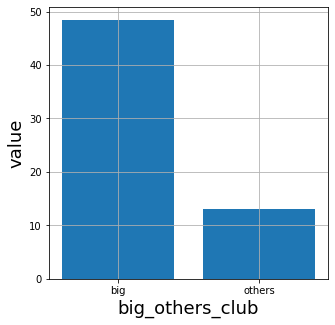

In [74]:
plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 
plt.ylabel('value', fontsize=18)
plt.xlabel('big_others_club', fontsize=18)
plt.bar(['big', 'others'], np.array(club_mean))
plt.show()

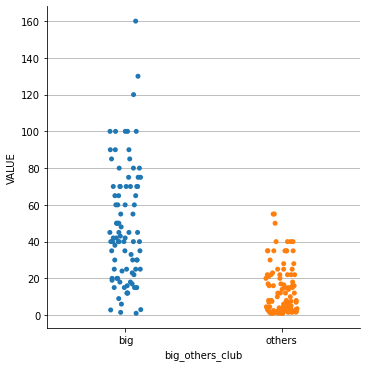

In [75]:
sns.catplot(data=data1, x = 'big_others_club', y = 'VALUE')